(0.0, 2.0, 0.0, 14.0)

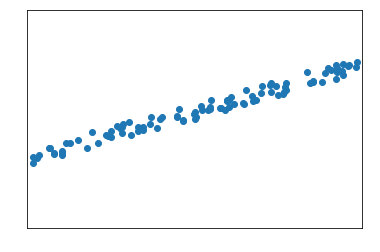

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

def white_2d_plot():
    ax = plt.subplot(111)
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    return ax



ax = white_2d_plot()
ax.scatter(X, y)
ax.axis([0, 2, 0, 14])

In [3]:
X

array([[1.4903877 ],
       [0.5683511 ],
       [1.96719164],
       [1.88949433],
       [0.16110217],
       [0.20787779],
       [1.09259717],
       [1.84935829],
       [1.34282014],
       [0.93335569],
       [0.07366291],
       [0.73273469],
       [0.30581681],
       [1.54485527],
       [0.03850094],
       [0.9108456 ],
       [1.15921677],
       [0.03319484],
       [0.38956204],
       [1.30664435],
       [0.80554134],
       [0.50506204],
       [0.55402917],
       [0.56896085],
       [1.00727752],
       [1.19501403],
       [0.69329074],
       [1.89037806],
       [1.5431515 ],
       [0.69221942],
       [1.0392784 ],
       [1.84566988],
       [0.25978103],
       [1.8515526 ],
       [1.84850075],
       [1.85007072],
       [1.78182457],
       [1.45938594],
       [1.00657186],
       [0.54052215],
       [1.09225643],
       [0.60842136],
       [1.04661047],
       [1.45967193],
       [1.00326516],
       [0.66128329],
       [0.77508905],
       [1.798

In [4]:
np.ones((100, 1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [5]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[4.44649766],
       [3.02539784]])

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.44649766],
       [10.49729334]])

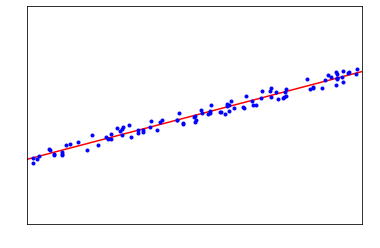

In [8]:
ax = white_2d_plot()
ax.plot(X_new, y_predict, "r-")
ax.plot(X, y, "b. ")
ax.axis([0, 2, 0, 15])
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.44649766]), array([[3.02539784]]))

In [10]:
lin_reg.predict(X_new)

array([[ 4.44649766],
       [10.49729334]])

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.44649766],
       [3.02539784]])

In [12]:
np.linalg.pinv(X_b).dot(y)

array([[4.44649766],
       [3.02539784]])

In [13]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [14]:
theta

array([[4.44649766],
       [3.02539784]])

In [15]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [16]:
theta

array([[4.45624704],
       [3.0214976 ]])

In [17]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [18]:
sgd_reg.intercept_, sgd_reg.coef_



(array([4.4250177]), array([3.06513965]))